In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("lung_cancer_mortality_data")

In [3]:
df

,Unnamed: 0,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257.0,1.0,1,0,0,Combined,2017-11-15,0
1,1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208.0,1.0,0,0,0,Radiation,2024-04-25,0
2,2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193.0,0.0,0,0,0,Surgery,2025-03-11,0
3,3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249.0,1.0,1,1,0,Surgery,2017-04-14,1
4,4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262.0,0.0,0,0,0,Chemotherapy,2024-09-20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,1999995,1999996,45.0,Female,Estonia,2021-03-26,Stage IV,2021-03-28,Yes,Former Smoker,41.4,243.0,1.0,1,1,0,Radiation,2022-02-02,0
1999996,1999996,1999997,68.0,Female,Austria,2019-04-05,Stage IV,2019-04-06,Yes,Never Smoked,39.4,281.0,1.0,0,0,0,Radiation,2020-05-11,0
1999997,1999997,1999998,46.0,Female,Poland,2018-10-30,Stage II,2018-11-02,Yes,Former Smoker,19.2,219.0,1.0,0,0,0,Surgery,2019-07-27,0
1999998,1999998,1999999,50.0,Male,Spain,2023-02-15,Stage I,2023-02-16,No,Passive Smoker,43.5,252.0,0.0,0,0,0,Combined,2024-03-11,0


In [4]:
df.shape

(2000000, 19)

In [5]:
df.head()

,Unnamed: 0,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257.0,1.0,1,0,0,Combined,2017-11-15,0
1,1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208.0,1.0,0,0,0,Radiation,2024-04-25,0
2,2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193.0,0.0,0,0,0,Surgery,2025-03-11,0
3,3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249.0,1.0,1,1,0,Surgery,2017-04-14,1
4,4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262.0,0.0,0,0,0,Chemotherapy,2024-09-20,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Unnamed: 0                   int64  
 1   id                           int64  
 2   age                          float64
 3   gender                       object 
 4   country                      object 
 5   diagnosis_date               object 
 6   cancer_stage                 object 
 7   beginning_of_treatment_date  object 
 8   family_history               object 
 9   smoking_status               object 
 10  bmi                          float64
 11  cholesterol_level            float64
 12  hypertension                 float64
 13  asthma                       int64  
 14  cirrhosis                    int64  
 15  other_cancer                 int64  
 16  treatment_type               object 
 17  end_treatment_date           object 
 18  survived                     int64  
dtype

In [7]:
df.describe()

,Unnamed: 0,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,2.000000e+06,2.000000e+06,1.999179e+06,1.959634e+06,1.998000e+06,1.989614e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,9.999995e+05,1.000000e+06,5.500103e+01,3.048846e+01,2.336022e+02,7.497143e-01,4.687255e-01,2.264135e-01,8.817200e-02,2.196725e-01
std,5.773504e+05,5.773504e+05,9.997676e+00,8.371143e+00,4.346951e+01,4.331777e-01,4.990211e-01,4.185099e-01,2.835449e-01,4.140249e-01
min,0.000000e+00,1.000000e+00,4.000000e+00,1.600000e+01,1.500000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.999998e+05,5.000008e+05,4.800000e+01,2.320000e+01,1.960000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.999995e+05,1.000000e+06,5.500000e+01,3.050000e+01,2.420000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.499999e+06,1.500000e+06,6.200000e+01,3.770000e+01,2.710000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.999999e+06,2.000000e+06,1.040000e+02,4.500000e+01,3.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
#Convert date columns to datetime
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])
df['beginning_of_treatment_date'] = pd.to_datetime(df['beginning_of_treatment_date'])

In [9]:
df

,Unnamed: 0,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257.0,1.0,1,0,0,Combined,2017-11-15,0
1,1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208.0,1.0,0,0,0,Radiation,2024-04-25,0
2,2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193.0,0.0,0,0,0,Surgery,2025-03-11,0
3,3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249.0,1.0,1,1,0,Surgery,2017-04-14,1
4,4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262.0,0.0,0,0,0,Chemotherapy,2024-09-20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,1999995,1999996,45.0,Female,Estonia,2021-03-26,Stage IV,2021-03-28,Yes,Former Smoker,41.4,243.0,1.0,1,1,0,Radiation,2022-02-02,0
1999996,1999996,1999997,68.0,Female,Austria,2019-04-05,Stage IV,2019-04-06,Yes,Never Smoked,39.4,281.0,1.0,0,0,0,Radiation,2020-05-11,0
1999997,1999997,1999998,46.0,Female,Poland,2018-10-30,Stage II,2018-11-02,Yes,Former Smoker,19.2,219.0,1.0,0,0,0,Surgery,2019-07-27,0
1999998,1999998,1999999,50.0,Male,Spain,2023-02-15,Stage I,2023-02-16,No,Passive Smoker,43.5,252.0,0.0,0,0,0,Combined,2024-03-11,0


In [10]:
df=df.drop('Unnamed: 0',axis=True)

In [11]:
df

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257.0,1.0,1,0,0,Combined,2017-11-15,0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208.0,1.0,0,0,0,Radiation,2024-04-25,0
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193.0,0.0,0,0,0,Surgery,2025-03-11,0
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249.0,1.0,1,1,0,Surgery,2017-04-14,1
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262.0,0.0,0,0,0,Chemotherapy,2024-09-20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,1999996,45.0,Female,Estonia,2021-03-26,Stage IV,2021-03-28,Yes,Former Smoker,41.4,243.0,1.0,1,1,0,Radiation,2022-02-02,0
1999996,1999997,68.0,Female,Austria,2019-04-05,Stage IV,2019-04-06,Yes,Never Smoked,39.4,281.0,1.0,0,0,0,Radiation,2020-05-11,0
1999997,1999998,46.0,Female,Poland,2018-10-30,Stage II,2018-11-02,Yes,Former Smoker,19.2,219.0,1.0,0,0,0,Surgery,2019-07-27,0
1999998,1999999,50.0,Male,Spain,2023-02-15,Stage I,2023-02-16,No,Passive Smoker,43.5,252.0,0.0,0,0,0,Combined,2024-03-11,0


In [12]:
df.dtypes

id                                      int64
age                                   float64
gender                                 object
country                                object
diagnosis_date                 datetime64[ns]
cancer_stage                           object
beginning_of_treatment_date    datetime64[ns]
family_history                         object
smoking_status                         object
bmi                                   float64
cholesterol_level                     float64
hypertension                          float64
asthma                                  int64
cirrhosis                               int64
other_cancer                            int64
treatment_type                         object
end_treatment_date             datetime64[ns]
survived                                int64
dtype: object

In [13]:
#Checking for null values
df.isnull().sum()

id                                 0
age                              821
gender                             0
country                            0
diagnosis_date                     0
cancer_stage                    6294
beginning_of_treatment_date        0
family_history                     0
smoking_status                  1972
bmi                            40366
cholesterol_level               2000
hypertension                   10386
asthma                             0
cirrhosis                          0
other_cancer                       0
treatment_type                     0
end_treatment_date                 0
survived                           0
dtype: int64

In [14]:
df.isnull().mean()

id                             0.000000
age                            0.000411
gender                         0.000000
country                        0.000000
diagnosis_date                 0.000000
cancer_stage                   0.003147
beginning_of_treatment_date    0.000000
family_history                 0.000000
smoking_status                 0.000986
bmi                            0.020183
cholesterol_level              0.001000
hypertension                   0.005193
asthma                         0.000000
cirrhosis                      0.000000
other_cancer                   0.000000
treatment_type                 0.000000
end_treatment_date             0.000000
survived                       0.000000
dtype: float64

In [15]:
#feature engineering
#Imputing missing values in numerical features
columns_to_fill_1 = ['age','bmi','cholesterol_level']
imputer1 = SimpleImputer(strategy='median')
df[columns_to_fill_1]=imputer1.fit_transform(df[columns_to_fill_1])

#Imputing missing values in categorical features
columns_to_fill_2 = ['cancer_stage','smoking_status','hypertension']
imputer2 = SimpleImputer(strategy='most_frequent')
df[columns_to_fill_2]=imputer2.fit_transform(df[columns_to_fill_2])

In [16]:
#Checking for null values
df.isnull().sum()

id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64

In [17]:
#Check for duplicate values
df.duplicated().sum()

np.int64(0)

EXPLORATORY DATA ANALYSIS


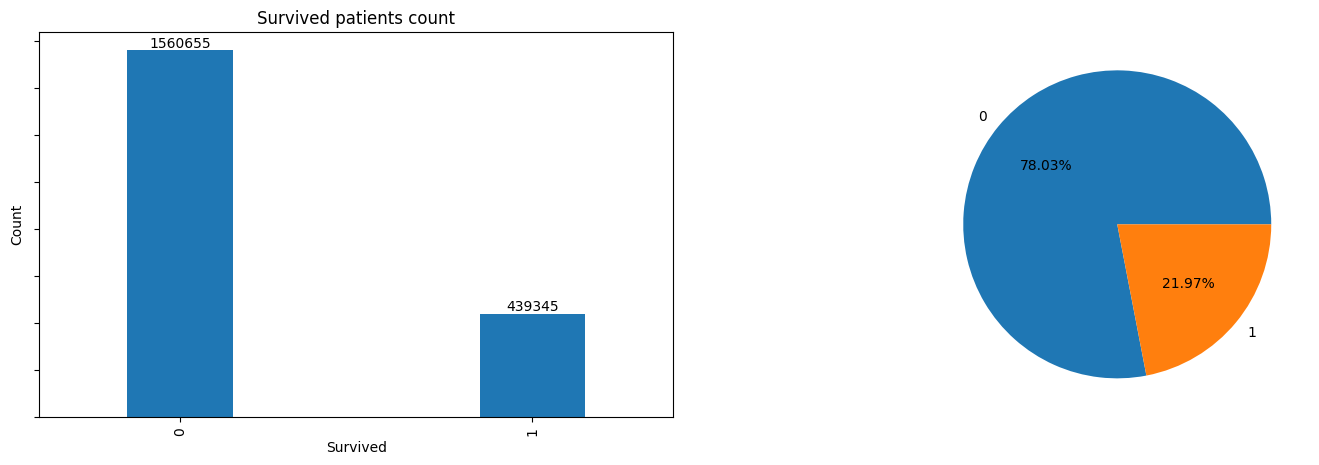

In [18]:
#Target Visualization
count = df["survived"].value_counts()
fig, axes = plt.subplots(ncols=2, figsize=(18, 5))
count.plot(kind="bar", ax=axes[0],width=0.3)
for container in axes[0].containers:
    axes[0].bar_label(container,fmt='%d')
axes[0].set_yticklabels(())
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Survived")
axes[0].set_title("Survived patients count")
count.plot(kind="pie", ax=axes[1], autopct="%0.2f%%")
axes[1].set_ylabel("")
plt.show()

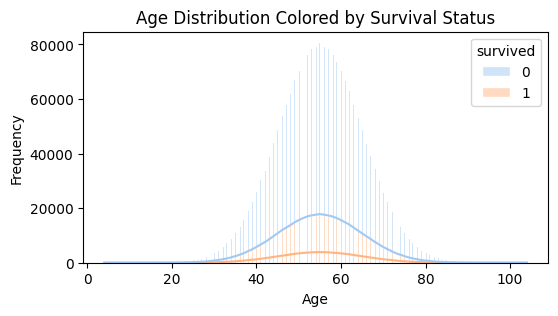

In [19]:
#Age distribution by Survival Status
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='age', hue='survived', multiple='stack', palette='pastel', kde=True,edgecolor="white")
plt.title('Age Distribution Colored by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

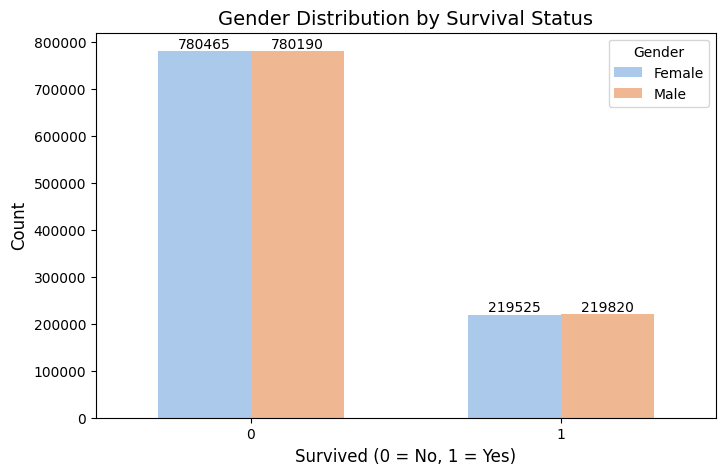

In [20]:
#Gender Distribution by Survival Status
# Set up the figure
plt.figure(figsize=(8, 5))

# Create a count plot
plot = sns.countplot(data=df, x='survived', hue='gender', palette='pastel',width=0.6)

for bar in plot.patches:
    # Get bar coordinates and height
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    if y > 0:  # Add annotation only if the bar has a height
        plot.annotate(f'{int(y)}', xy=(x, y), xytext=(0, 5),
                      textcoords='offset points', ha='center', va='center', fontsize=10)

# Customize the plot
plt.title('Gender Distribution by Survival Status', fontsize=14)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender', loc='upper right')

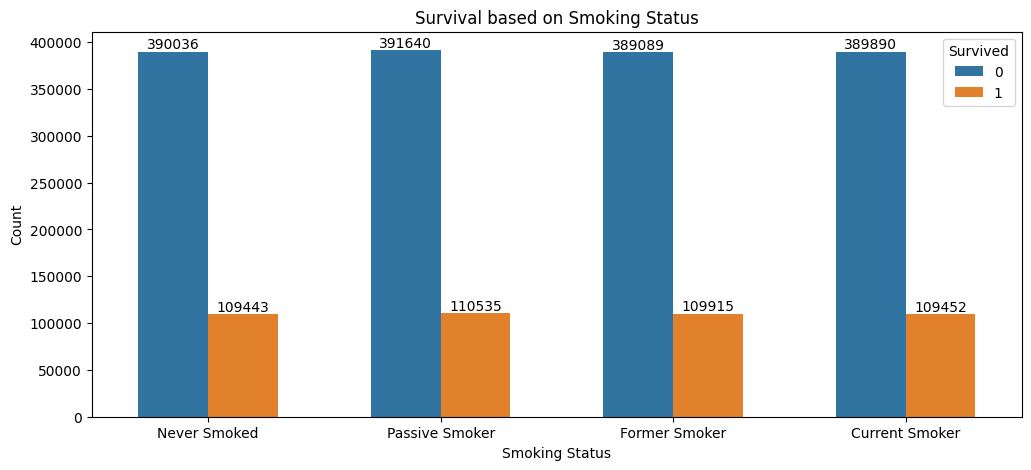

In [21]:
#smoking status Distribution by Survival Status
# Set up the figure
plt.figure(figsize=(12, 5))
plot = sns.countplot(data=df, x='smoking_status', hue='survived',width=0.6)

for bar in plot.patches:
    # Get bar coordinates and height
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    if y > 0:  # Add annotation only if the bar has a height
        plot.annotate(f'{int(y)}', xy=(x, y), xytext=(0, 5),
                      textcoords='offset points', ha='center', va='center', fontsize=10)
plt.title('Survival based on Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

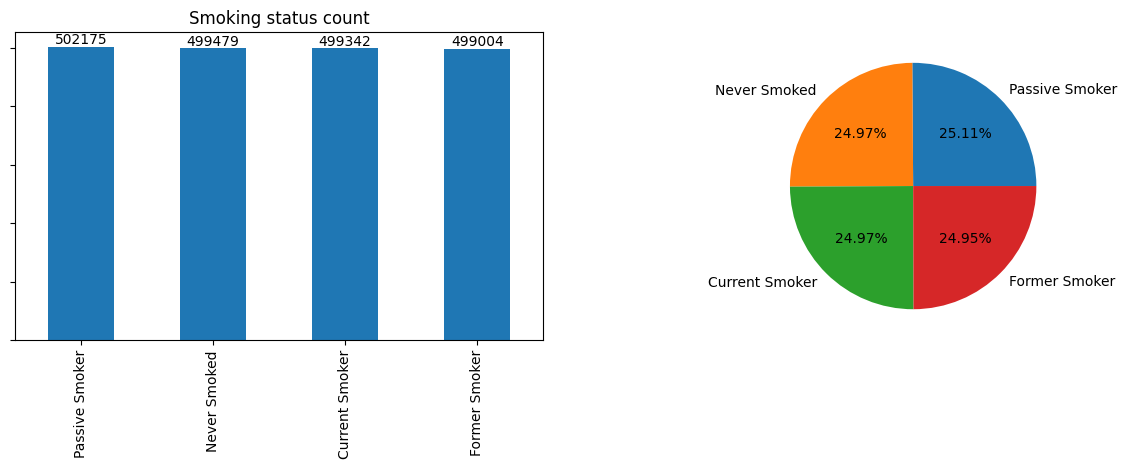

In [22]:
#Smoking status distribution
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
df["smoking_status"].value_counts().plot(kind="bar", ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[0].set_title("Smoking status count")
df["smoking_status"].value_counts().plot(kind="pie", ax=axes[1], autopct="%0.2f%%")
axes[1].set_ylabel("")
plt.show()

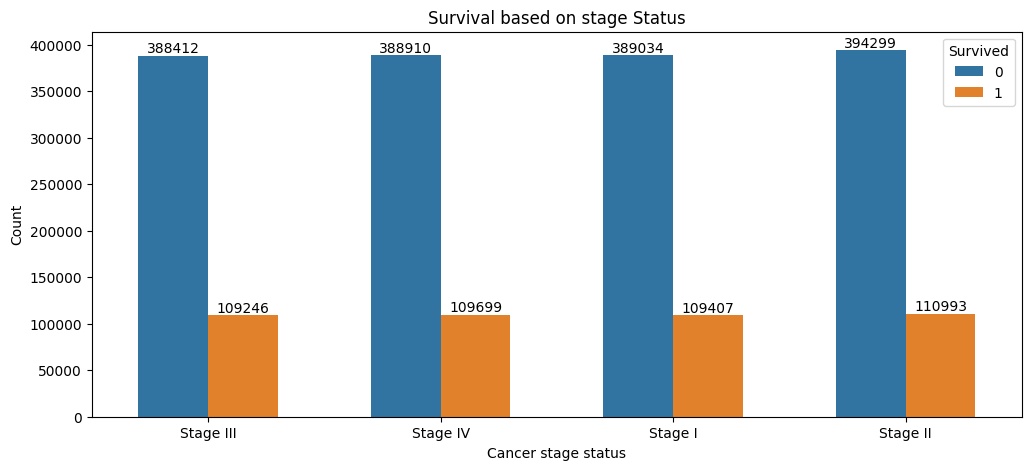

In [23]:
#Cancer Stage Distribution by Survival Status
plt.figure(figsize=(12, 5))
plot = sns.countplot(data=df, x='cancer_stage', hue='survived',width=0.6)

for bar in plot.patches:
    # Get bar coordinates and height
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    if y > 0:  # Add annotation only if the bar has a height
        plot.annotate(f'{int(y)}', xy=(x, y), xytext=(0, 5),
                      textcoords='offset points', ha='center', va='center', fontsize=10)


plt.title('Survival based on stage Status')
plt.xlabel('Cancer stage status')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

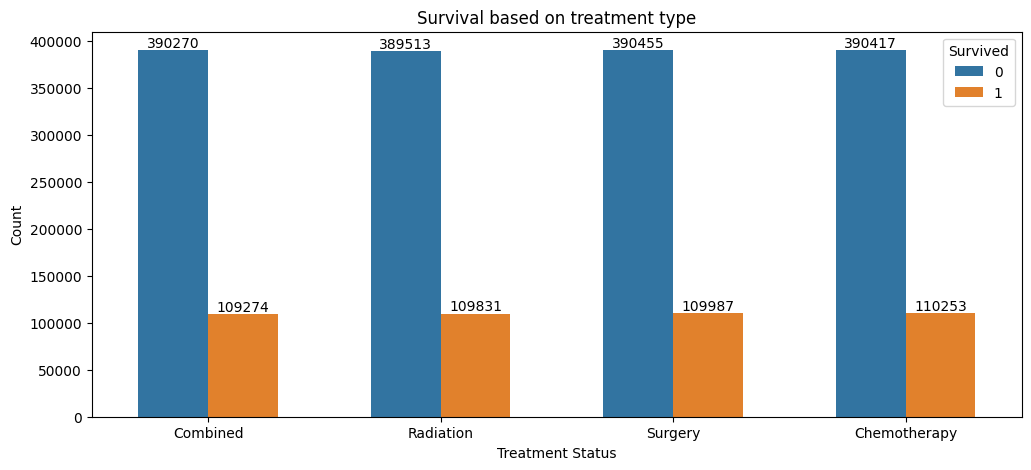

In [24]:
#Treatment Type Distribution by Survival Status
plt.figure(figsize=(12, 5))
plot = sns.countplot(data=df, x='treatment_type', hue='survived',width=0.6)

for bar in plot.patches:
    # Get bar coordinates and height
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    if y > 0:  # Add annotation only if the bar has a height
        plot.annotate(f'{int(y)}', xy=(x, y), xytext=(0, 5),
                      textcoords='offset points', ha='center', va='center', fontsize=10)
        
plt.title('Survival based on treatment type')
plt.xlabel('Treatment Status')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

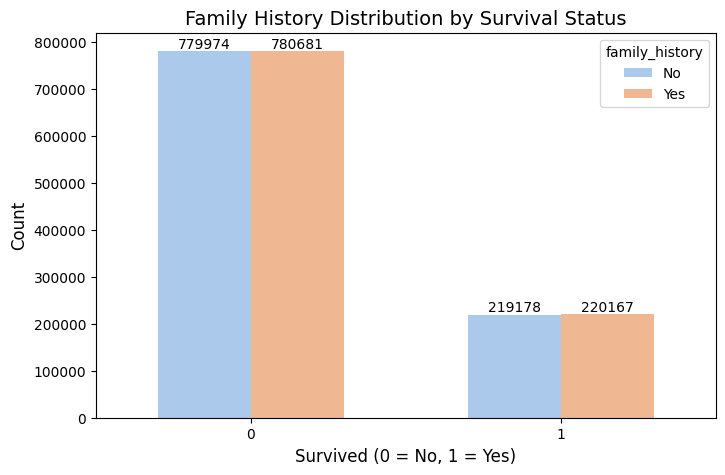

In [25]:
#Family Distribution by Survival Status
plt.figure(figsize=(8, 5))

# Create a count plot
plot = sns.countplot(data=df, x='survived', hue='family_history', palette='pastel',width=0.6)

for bar in plot.patches:
    # Get bar coordinates and height
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    if y > 0:  # Add annotation only if the bar has a height
        plot.annotate(f'{int(y)}', xy=(x, y), xytext=(0, 5),
                      textcoords='offset points', ha='center', va='center', fontsize=10)

# Customize the plot
plt.title('Family History Distribution by Survival Status', fontsize=14)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='family_history', loc='upper right')

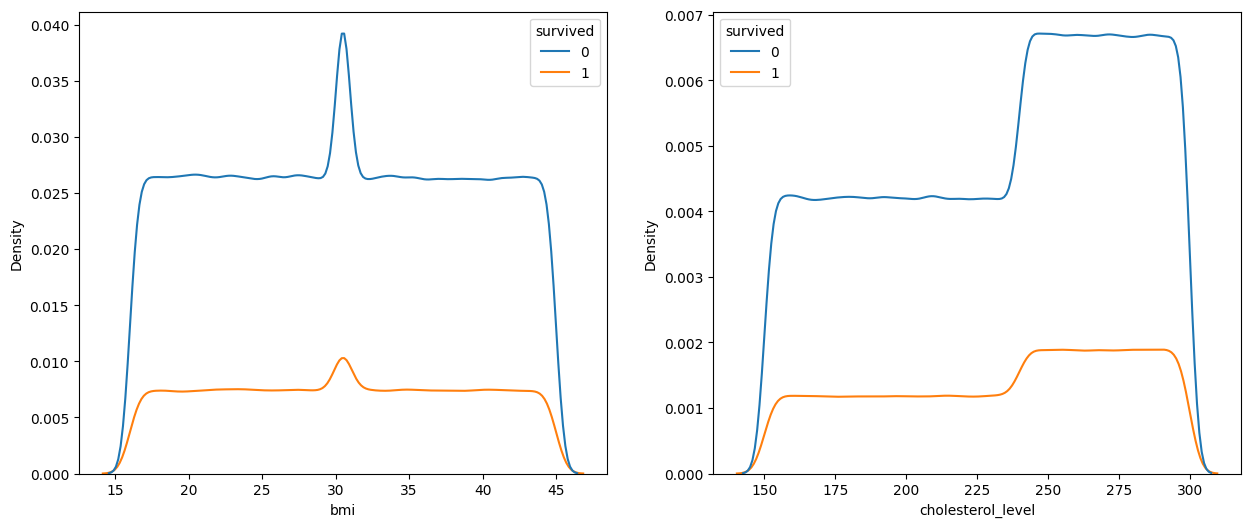

In [26]:
#BMI and Cholesterol levels distribution by Survival Status
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.kdeplot(df, x="bmi", hue="survived", ax=axes[0])
sns.kdeplot(df, x="cholesterol_level", hue="survived", ax=axes[1])
plt.show()

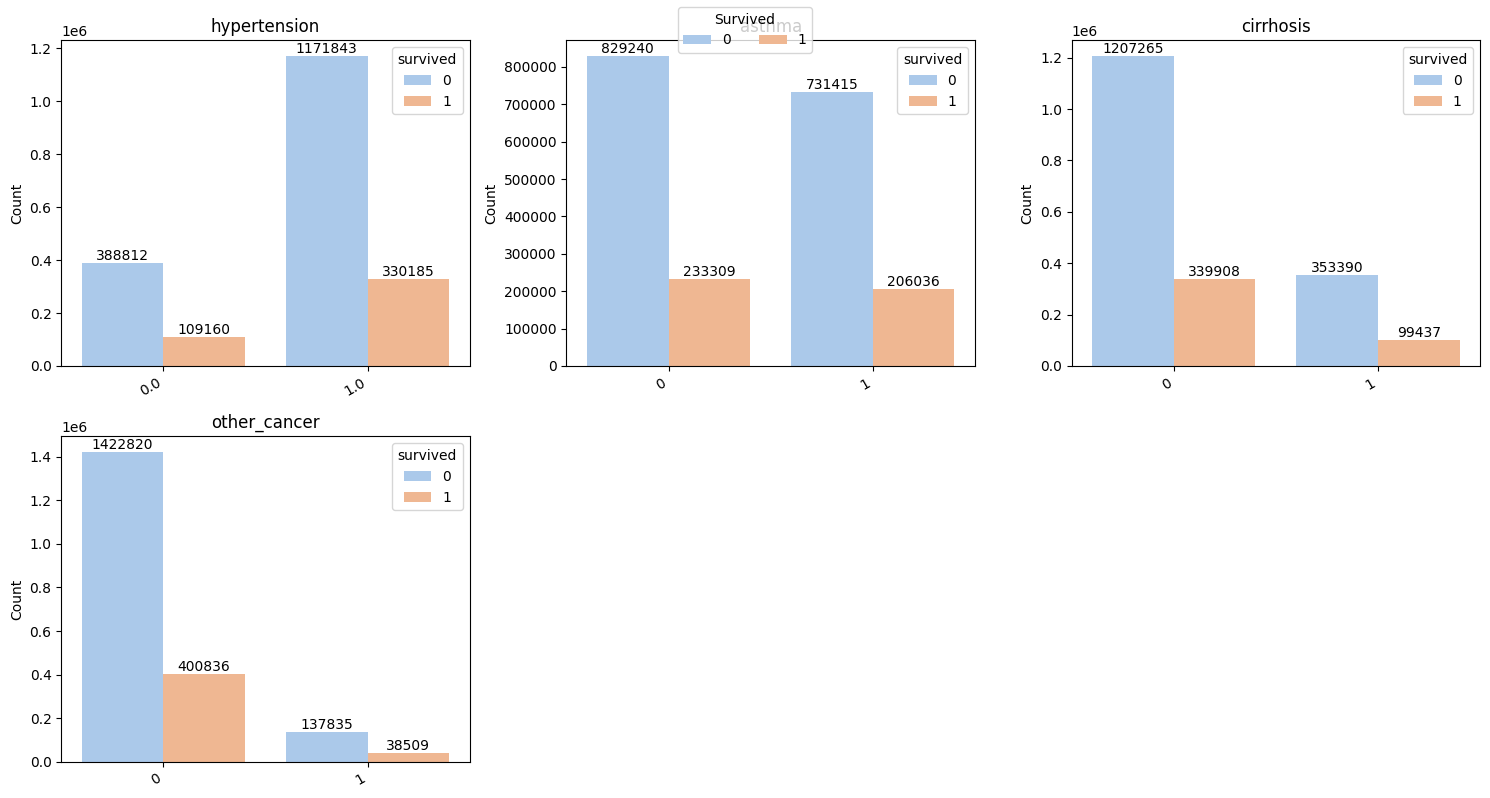

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['hypertension', 'asthma', 'cirrhosis', 'other_cancer']
# Reshape the data
melted_df = df.melt(id_vars='survived', value_vars=variables)

# Set up the figure with subplots
num_vars = len(variables)
cols = 3  # Number of columns in the grid
rows = (num_vars + cols - 1) // cols  # Calculate rows dynamically
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharey=False)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot countplots for each variable
for i, var in enumerate(variables):
    ax = axes[i]
    sns.countplot(
        data=melted_df[melted_df['variable'] == var],
        x='value',
        hue='survived',
        palette='pastel',
        dodge=True,
        ax=ax
    )
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    # Add counts on top of the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge')
    # Set titles and labels
    ax.set_title(var)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# Hide unused subplots if variables < total subplots
for j in range(len(variables), len(axes)):
    axes[j].axis('off')

# Add a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Survived', loc='upper center', ncol=2)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Feature Engineering 

In [28]:
# Encoding Categorical Features
#ordinal encoding of Cancer Stage ,  Smoking Status, Treatment Type
columns_to_encode_1 = ['cancer_stage','smoking_status','treatment_type']
oe = OrdinalEncoder(categories=[['Stage I','Stage II','Stage III','Stage IV'],
                                ['Never Smoked','Former Smoker','Passive Smoker','Current Smoker'],
                                ['Surgery','Radiation','Chemotherapy','Combined']])     
oetransform = oe.fit_transform(df[columns_to_encode_1])
df[columns_to_encode_1]=oetransform

# one hot encoding on categorical features
columns_to_encode_2 = ['gender','family_history']
ohe = OneHotEncoder(sparse_output=False,drop='first')
ohetransform = ohe.fit_transform(df[columns_to_encode_2])
df_ohe=pd.DataFrame(ohetransform,columns=ohe.get_feature_names_out(columns_to_encode_2))

df_1=pd.concat([df,df_ohe],axis=1)
df_1

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,gender_Male,family_history_Yes
0,1,64.0,Female,Germany,2016-04-07,2.0,2016-04-21,No,0.0,31.1,257.0,1.0,1,0,0,3.0,2017-11-15,0,0.0,0.0
1,2,50.0,Male,Czech Republic,2023-04-22,2.0,2023-05-02,Yes,2.0,25.9,208.0,1.0,0,0,0,1.0,2024-04-25,0,1.0,1.0
2,3,65.0,Male,Romania,2023-04-07,3.0,2023-04-12,No,0.0,18.9,193.0,0.0,0,0,0,0.0,2025-03-11,0,1.0,0.0
3,4,51.0,Female,Latvia,2016-02-07,2.0,2016-02-13,Yes,1.0,34.6,249.0,1.0,1,1,0,0.0,2017-04-14,1,0.0,1.0
4,5,37.0,Male,Greece,2023-12-01,0.0,2023-12-03,Yes,0.0,40.2,262.0,0.0,0,0,0,2.0,2024-09-20,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,1999996,45.0,Female,Estonia,2021-03-26,3.0,2021-03-28,Yes,1.0,41.4,243.0,1.0,1,1,0,1.0,2022-02-02,0,0.0,1.0
1999996,1999997,68.0,Female,Austria,2019-04-05,3.0,2019-04-06,Yes,0.0,39.4,281.0,1.0,0,0,0,1.0,2020-05-11,0,0.0,1.0
1999997,1999998,46.0,Female,Poland,2018-10-30,1.0,2018-11-02,Yes,1.0,19.2,219.0,1.0,0,0,0,0.0,2019-07-27,0,0.0,1.0
1999998,1999999,50.0,Male,Spain,2023-02-15,0.0,2023-02-16,No,2.0,43.5,252.0,0.0,0,0,0,3.0,2024-03-11,0,1.0,0.0


In [29]:
# Calculate the treatment delay (time between diagnosis and start of treatment)
df_1['treatment_delay_days'] = (df_1['beginning_of_treatment_date']-df_1['diagnosis_date']).dt.days

# Calculate the duration of treatment in days
df_1['treatment_duration_days'] = (df_1['end_treatment_date']-df_1['beginning_of_treatment_date']).dt.days



In [30]:
df_1.drop(['id','gender','country','diagnosis_date','beginning_of_treatment_date',
               'end_treatment_date','family_history'],axis=1,inplace=True)

In [31]:
df_1

,age,cancer_stage,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,gender_Male,family_history_Yes,treatment_delay_days,treatment_duration_days
0,64.0,2.0,0.0,31.1,257.0,1.0,1,0,0,3.0,0,0.0,0.0,14,573
1,50.0,2.0,2.0,25.9,208.0,1.0,0,0,0,1.0,0,1.0,1.0,10,359
2,65.0,3.0,0.0,18.9,193.0,0.0,0,0,0,0.0,0,1.0,0.0,5,699
3,51.0,2.0,1.0,34.6,249.0,1.0,1,1,0,0.0,1,0.0,1.0,6,426
4,37.0,0.0,0.0,40.2,262.0,0.0,0,0,0,2.0,0,1.0,1.0,2,292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,45.0,3.0,1.0,41.4,243.0,1.0,1,1,0,1.0,0,0.0,1.0,2,311
1999996,68.0,3.0,0.0,39.4,281.0,1.0,0,0,0,1.0,0,0.0,1.0,1,401
1999997,46.0,1.0,1.0,19.2,219.0,1.0,0,0,0,0.0,0,0.0,1.0,3,267
1999998,50.0,0.0,2.0,43.5,252.0,0.0,0,0,0,3.0,0,1.0,0.0,1,389


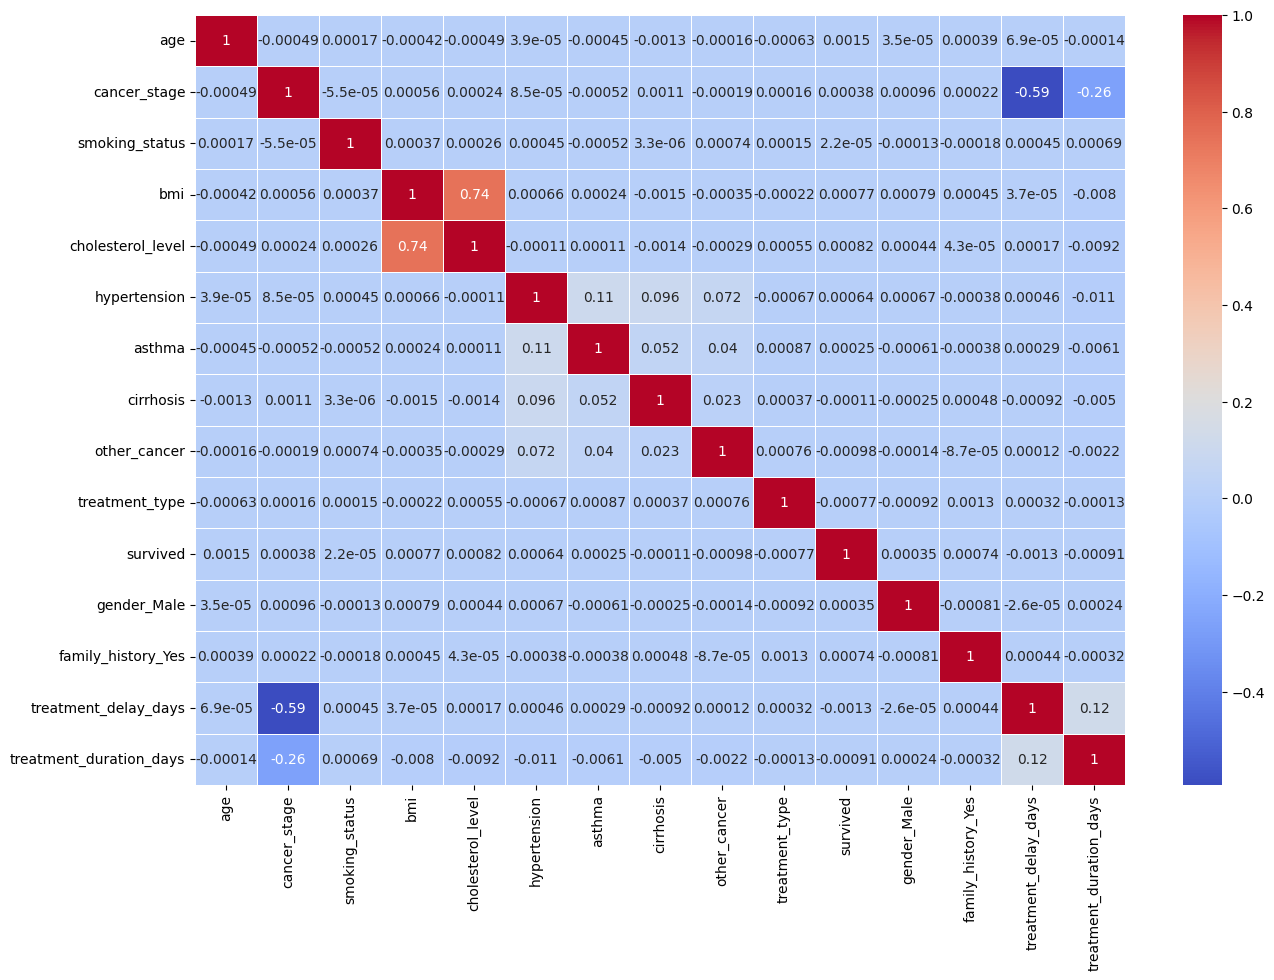

In [32]:
#visualization of features correlation
correlation_matrix = df_1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidth=0.7)
plt.show()

Model Traning and Evaluation

In [33]:
X = df_1.drop(['survived'],axis=1)
y = df_1['survived']

In [34]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
X_train

,age,cancer_stage,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,gender_Male,family_history_Yes,treatment_delay_days,treatment_duration_days
1818077,60.0,2.0,2.0,30.5,223.0,1.0,0,1,0,2.0,1.0,0.0,8,482
919504,35.0,2.0,1.0,30.4,252.0,1.0,0,1,0,3.0,1.0,1.0,7,552
1816073,45.0,1.0,0.0,37.9,282.0,1.0,1,1,0,3.0,1.0,0.0,13,483
1189484,50.0,1.0,0.0,18.4,156.0,0.0,1,0,0,2.0,1.0,0.0,21,511
1346333,69.0,3.0,2.0,23.6,156.0,1.0,0,0,0,1.0,0.0,0.0,1,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,52.0,2.0,0.0,39.1,271.0,1.0,0,0,1,1.0,0.0,0.0,4,181
1414414,60.0,1.0,3.0,44.5,283.0,1.0,0,0,0,0.0,1.0,1.0,13,283
131932,50.0,2.0,1.0,38.6,272.0,1.0,1,1,0,0.0,0.0,0.0,8,432
671155,64.0,0.0,2.0,42.2,259.0,0.0,0,0,0,3.0,0.0,1.0,25,646


In [36]:
X_test

,age,cancer_stage,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,gender_Male,family_history_Yes,treatment_delay_days,treatment_duration_days
1828401,51.0,2.0,0.0,40.8,289.0,1.0,0,0,0,0.0,1.0,0.0,11,278
1200071,65.0,0.0,2.0,44.0,284.0,1.0,0,0,0,0.0,0.0,1.0,27,659
194849,53.0,0.0,0.0,35.7,265.0,1.0,0,1,0,1.0,1.0,1.0,11,449
1629054,52.0,1.0,1.0,24.7,163.0,1.0,0,1,0,1.0,0.0,0.0,12,518
191144,38.0,2.0,0.0,33.1,245.0,1.0,0,0,1,0.0,1.0,1.0,12,406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573340,63.0,1.0,2.0,18.1,150.0,1.0,1,0,0,1.0,1.0,0.0,13,398
1963164,49.0,0.0,1.0,25.6,212.0,1.0,1,0,0,2.0,1.0,0.0,29,527
1771309,45.0,1.0,1.0,22.4,174.0,1.0,1,1,0,3.0,1.0,1.0,21,374
794110,59.0,1.0,0.0,29.4,152.0,1.0,0,1,0,3.0,1.0,1.0,16,553


In [37]:
#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [38]:
X_train

array([[ 0.49985035,  0.44912771,  0.44691827, ..., -1.00160987,
        -0.20964609,  0.24103579],
       [-1.99924217,  0.44912771, -0.44794993, ...,  0.99839272,
        -0.34970179,  0.74710768],
       [-0.99960516, -0.44640019, -1.34281814, ..., -1.00160987,
         0.49063245,  0.24826539],
       ...,
       [-0.49978666,  0.44912771, -0.44794993, ..., -1.00160987,
        -0.20964609, -0.12044413],
       [ 0.89970515, -1.34192808,  0.44691827, ...,  0.99839272,
         2.17130092,  1.42668993],
       [-0.09993185, -1.34192808, -0.44794993, ...,  0.99839272,
        -0.6298132 ,  1.07966921]])

In [39]:
X_test

array([[-0.40134468,  0.44983209, -1.34306324, ..., -0.99907376,
         0.20903149, -1.23190938],
       [ 1.00189589, -1.34094234,  0.44654836, ...,  1.0009271 ,
         2.44689872,  1.52068406],
       [-0.20088174, -1.34094234, -1.34306324, ...,  1.0009271 ,
         0.20903149,  0.00350657],
       ...,
       [-1.00273349, -0.44555512, -0.44825744, ...,  1.0009271 ,
         1.6076985 , -0.53834253],
       [ 0.40050708, -0.44555512, -1.34306324, ...,  1.0009271 ,
         0.90836499,  0.75487066],
       [ 1.3025903 ,  1.34521931,  0.44654836, ..., -0.99907376,
        -0.63016873,  0.19857225]])

Applying SMOTE to deal with class imbalance

In [40]:
smote = SMOTE()
print("Before: ", Counter(y_train))
X_train, y_train = smote.fit_resample(X_train, y_train)
print("After: ", Counter(y_train))

Before:  Counter({0: 1092089, 1: 307911})
After:  Counter({0: 1092089, 1: 1092089})


Model Training and Evaluation

In [41]:
# 1.Applying Logistic regression
lf = LogisticRegression()
lf.fit(X_train,y_train)
y_train_pred = lf.predict(X_train)
y_test_pred = lf.predict(X_test)

#Training set Performance
model_train_accuracy=accuracy_score(y_train,y_train_pred)
model_train_precision=precision_score(y_train,y_train_pred,average='weighted')
model_train_recall=recall_score(y_train,y_train_pred,average='weighted')
model_train_confusion_matrix=confusion_matrix(y_train,y_train_pred)

#Test set Performance
model_test_accuracy=accuracy_score(y_test,y_test_pred)
model_test_precision=precision_score(y_test,y_test_pred,average='weighted')
model_test_recall=recall_score(y_test,y_test_pred,average='weighted')
model_test_confusion_matrix=confusion_matrix(y_test,y_test_pred)


print('Model performance for Training set')
print('-Accuracy:{:.4f}'.format(model_train_accuracy))
print('-Precison:{:.4f}'.format(model_train_precision))
print('-Recall:{:.4f}'.format(model_train_recall))
print(model_train_confusion_matrix)

print('-----------------------------------')
    
print('Model performance for Test set')
print('-Accuracy:{:.4f}'.format(model_test_accuracy))
print('-Precison:{:.4f}'.format(model_test_precision))
print('-Recall:{:.4f}'.format(model_test_recall))
print(model_test_confusion_matrix)


Model performance for Training set
-Accuracy:0.5020
-Precison:0.5020
-Recall:0.5020
[[539430 552659]
 [534955 557134]]
-----------------------------------
Model performance for Test set
-Accuracy:0.4959
-Precison:0.6575
-Recall:0.4959
[[231065 237501]
 [ 64960  66474]]
